In [5]:
from pathlib import Path

import healpy as hp
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import numpy as np

jax.config.update("jax_enable_x64", True)
%matplotlib widget

In [7]:
DATA_DIR = Path("/home/christian/Documents/research/eigsep/data-analysis/notebooks/christian/deployment4/beam_mapping/data")

In [54]:
f1 = DATA_DIR / "Gain_Phi/Freq_14062495Hz.csv"
d = np.loadtxt(f1, delimiter=",", skiprows=1)

In [55]:
theta = None
phi = None
freqs = []
gain_phi = []
gain_theta = []
gain_total = []
dirs = ["Gain_Phi", "Gain_Theta", "Gain_Total"]

for f in Path(DATA_DIR / dirs[0]).iterdir():    
    freq = f.name.split("_")[1].split("H")[0]
    freq = float(freq)/1e5  # why?
    freqs.append(freq)

    if theta is None:
        d = np.loadtxt(f, delimiter=",", skiprows=1, usecols=(0, 1))
        phi = d[:, 0]
        theta = d[:, 1]

    # phi
    gph = np.loadtxt(f, delimiter=",", skiprows=1, usecols=2)
    # theta
    fth = Path(DATA_DIR / dirs[1] / f.name)
    gth = np.loadtxt(f2, delimiter=",", skiprows=1, usecols=2)
    # total
    ftot = Path(DATA_DIR / dirs[2] / f.name)
    gtot = np.loadtxt(f2, delimiter=",", skiprows=1, usecols=2)
    # append to lists
    gain_phi.append(gph)
    gain_theta.append(gth)
    gain_total.append(gtot)
    
freqs = np.array(freqs)
gain = np.array([gain_phi, gain_theta, gain_total])

fsort = np.argsort(freqs)
freqs = freqs[fsort]
gain = gain.swapaxes(0, 1)[fsort]

In [59]:
df = freqs[1] - freqs[0]
print(np.allclose(np.diff(freqs), df))
print(df)
print(df / 16, 250/1024)

True
3.90625
0.244140625 0.244140625


False


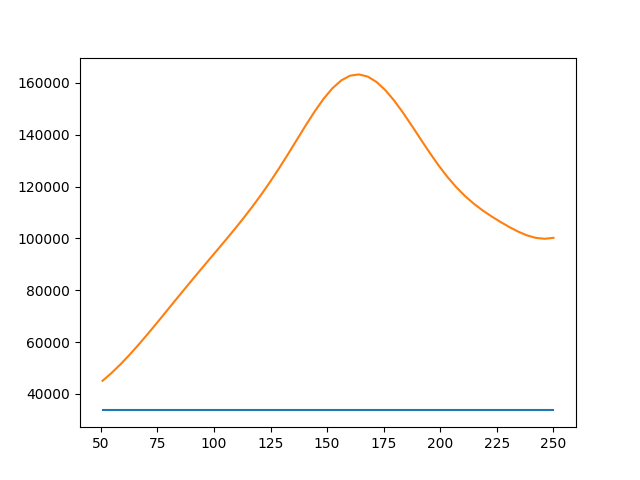

In [72]:
# consistency check for gain
gtot_abs = np.abs(gain[:, 0])**2 + np.abs(gain[:, 1])**2
print(np.allclose(np.abs(gain[:, 2])**2, gtot_abs))

plt.figure()
plt.plot(freqs, np.sum(np.abs(gain[:, 2])**2, axis=1))
plt.plot(freqs, np.sum(gtot_abs, axis=1))
plt.show()

In [82]:
th = theta.reshape(181, 361)[:, 0]
ph = phi.reshape(181, 361)[0, :-1]
gain = gain.reshape(*gain.shape[:2], 181, 361)[..., :-1]

(52, 3, 181, 360)

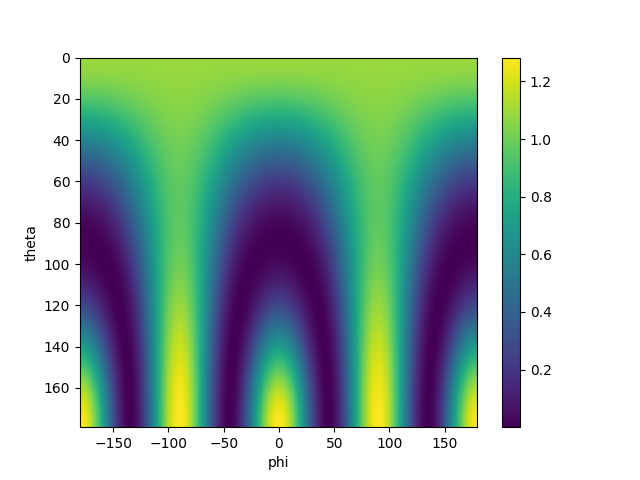

In [95]:
plt.figure()
plt.imshow(gain[1, 2], aspect="auto", extent=[-180, 179, 179, 0])
plt.xlabel("phi")
plt.ylabel("theta")
plt.colorbar()
plt.show()